In [521]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [522]:
training_labels = pd.read_csv('/content/training_set_labels.csv')
training_features = pd.read_csv('/content/training_set_features.csv')

In [523]:
train = pd.merge(training_features, training_labels, on='respondent_id')

In [524]:
train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [525]:
train.shape

(26707, 38)

In [526]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [527]:
train = train.drop(columns=['employment_occupation','employment_industry','health_insurance']).copy()

In [528]:
train.shape

(26707, 35)

In [529]:
strings = train.select_dtypes(include = 'object').columns
train[strings].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


All Categorical features which are NULL are substituted with the mode of data, and the Numeric features with NULLs are substituted with the **means**

In [530]:
# All the NULL values are populated with the mode
for col in train.columns:
    if train[col].isnull().sum() and train[col].dtypes != 'object':
        train[col].loc[(train[col].isnull())] = train[col].median()
for col in train.columns:
    if train[col].isnull().sum() and train[col].dtypes == 'object':
        train[col].loc[(train[col].isnull())] = train[col].mode().max()

In [531]:
train.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Label encoding

In [532]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in strings:
    train[col] = LE.fit_transform(train[col])

In [533]:
train[strings].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,3,1,3,0,2,1,0,1,8,2
1,1,0,3,1,2,1,1,0,1,0
2,0,2,3,1,0,1,0,0,9,0
3,4,0,3,0,2,1,1,1,5,1
4,2,3,3,0,0,0,0,0,9,0



# **Feature understanding**

<Axes: >

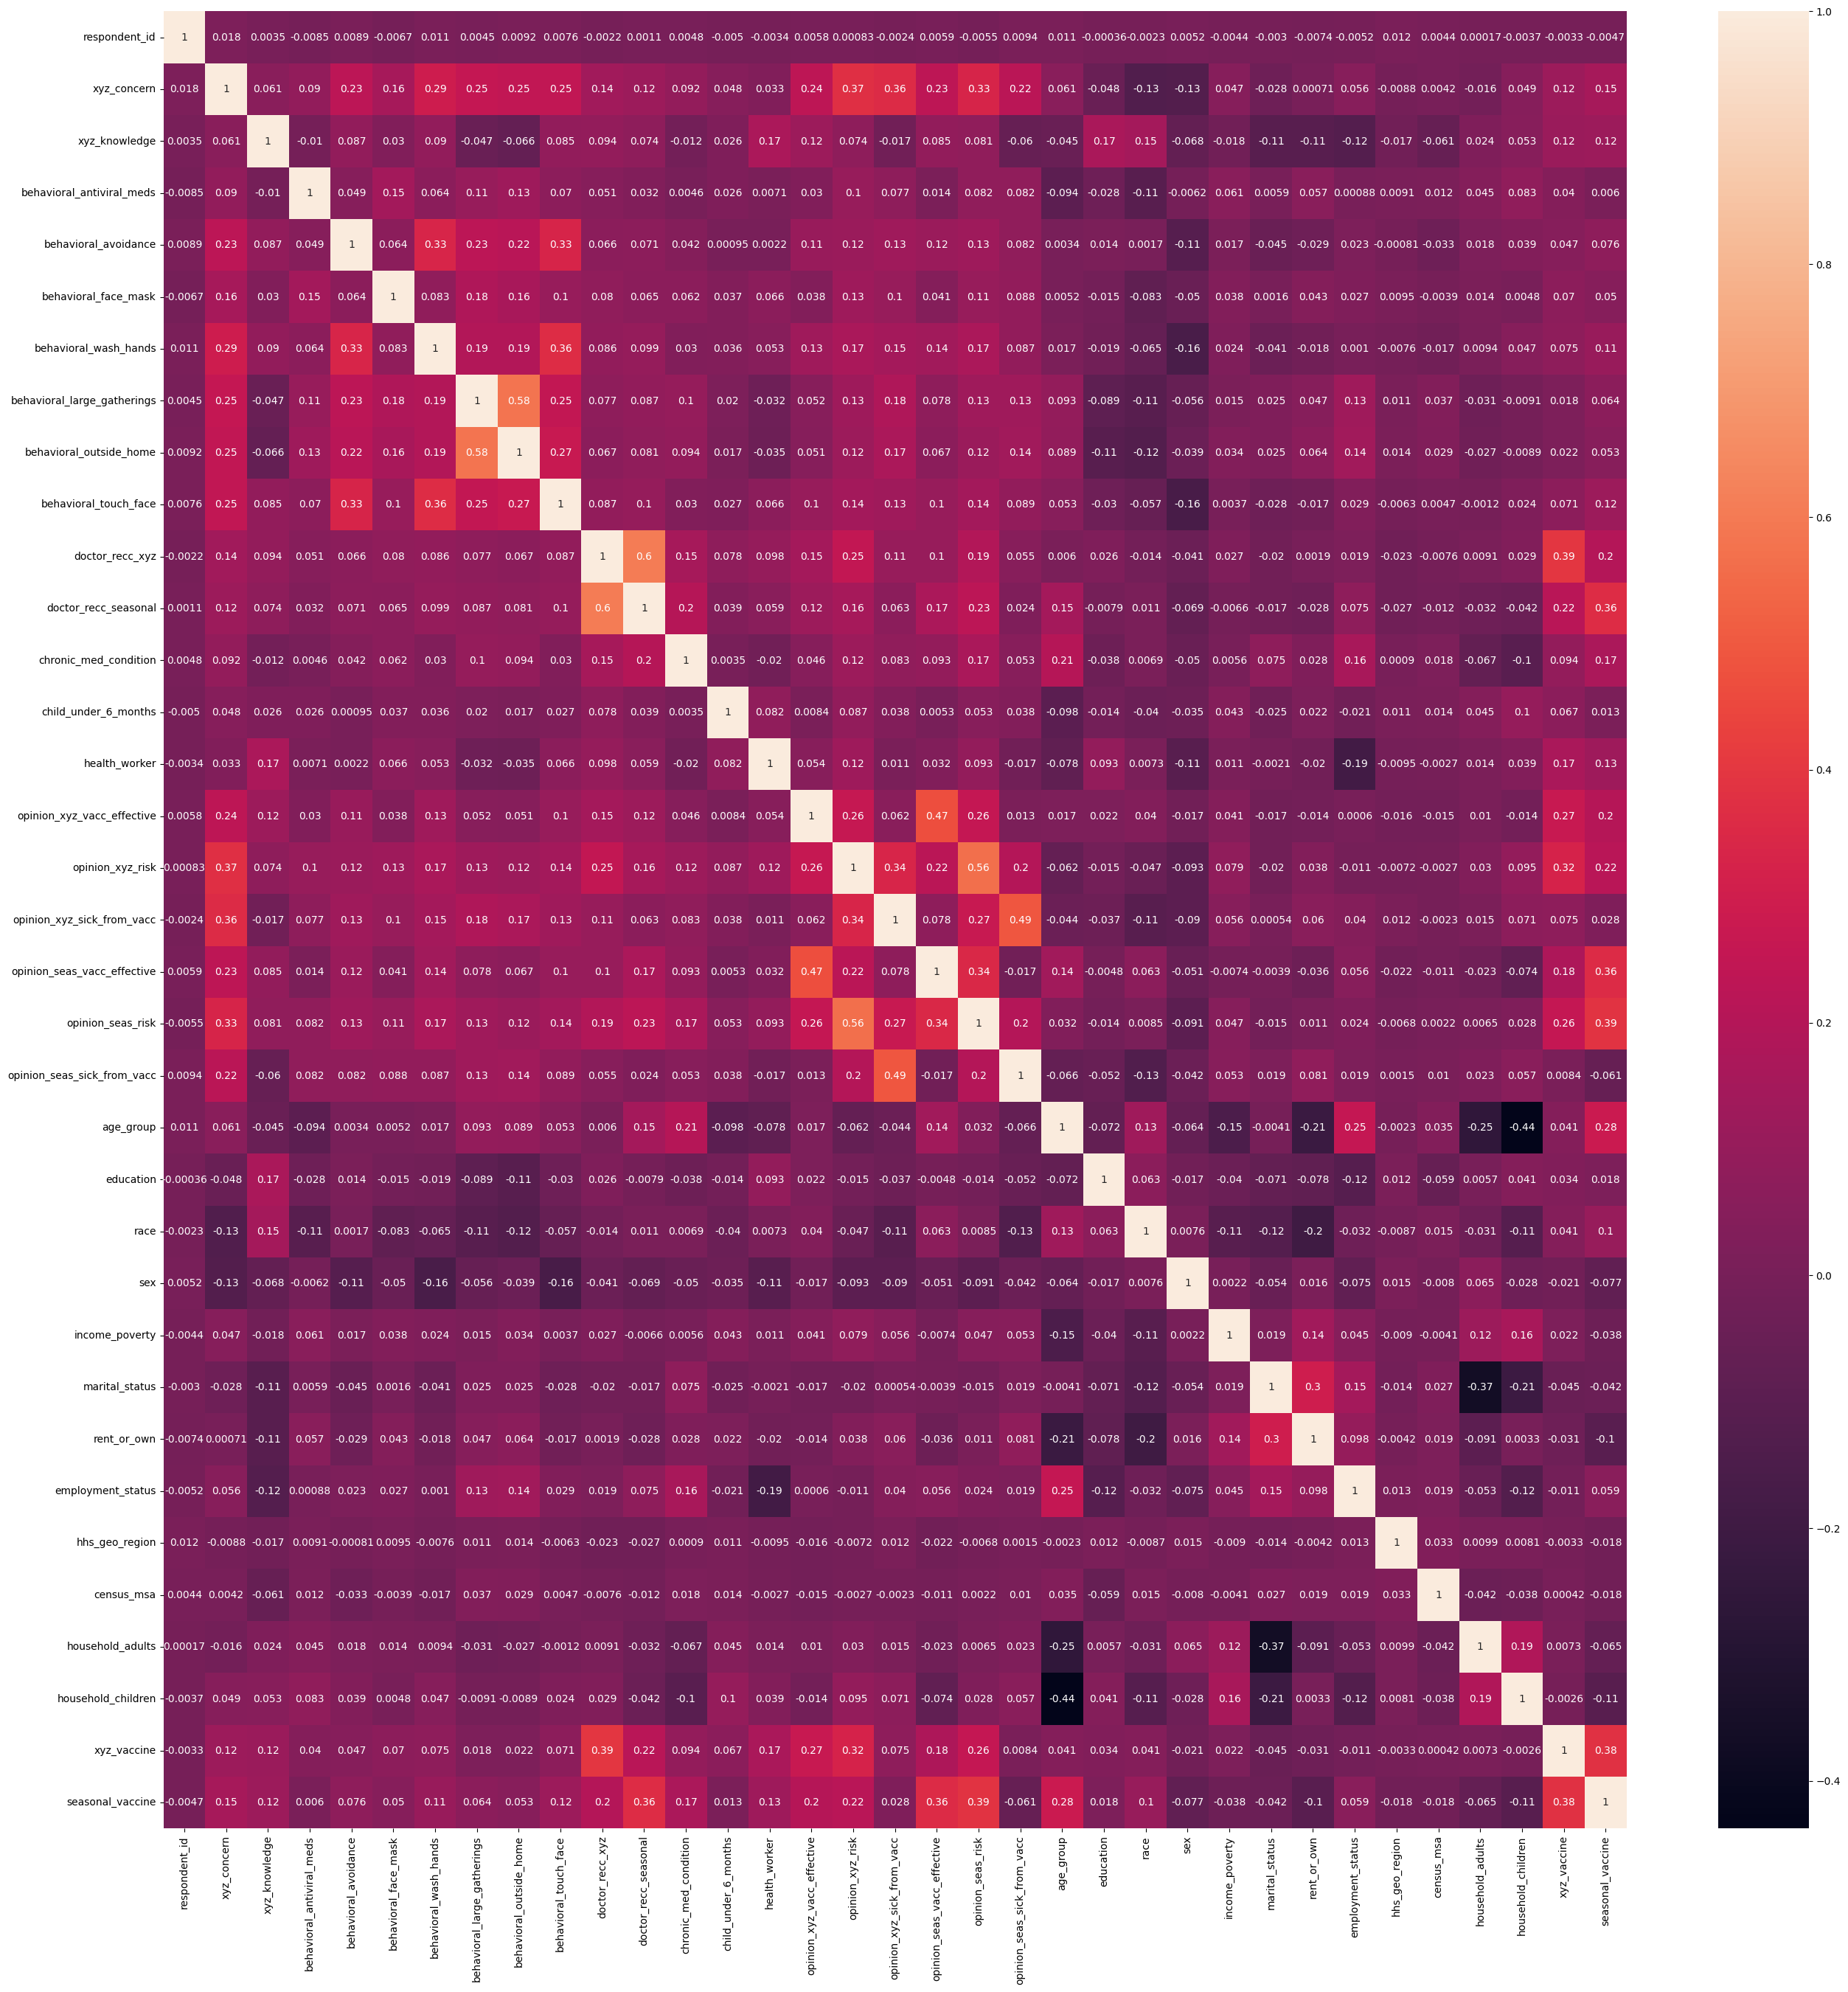

In [534]:
corr = train.corr()
plt.figure(figsize=(32,32))
sns.heatmap(corr, annot=True)

In [535]:
train.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine'],
      dtype='object')

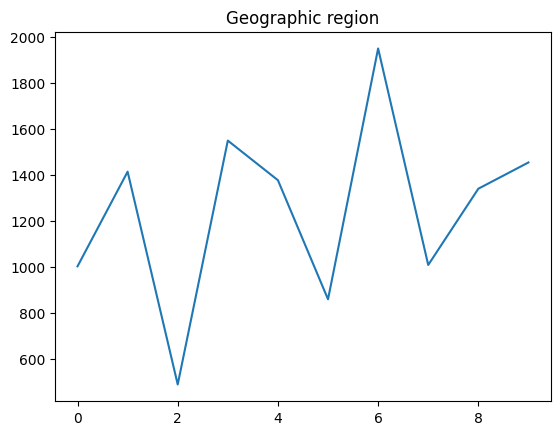

In [536]:
df = train[train["seasonal_vaccine"] == 1].groupby(train['hhs_geo_region']).sum()
plt.title('Geographic region')
plt.plot(df['seasonal_vaccine'])
plt.show()

In [537]:
neatness_data = train['behavioral_antiviral_meds'] + train['behavioral_avoidance']+train['behavioral_face_mask']+train[ 'behavioral_wash_hands']+train['behavioral_large_gatherings']+train[ 'behavioral_outside_home']+train['behavioral_touch_face']

In [538]:
train.insert(loc = 5,
          column = 'coneatness',
          value = neatness_data)

In [539]:
train.drop(['respondent_id','behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask',
       'behavioral_large_gatherings', 'behavioral_outside_home',
        'hhs_geo_region','employment_status','education','census_msa'],axis=1,inplace = True)

In [540]:
train.shape

(26707, 26)

In [541]:
train.head()

,xyz_concern,xyz_knowledge,coneatness,behavioral_wash_hands,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,income_poverty,marital_status,rent_or_own,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,3,0,2,1,0,0.0,0.0,0,0
1,3.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,3,1,2,1,1,0.0,0.0,0,1
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,3,1,0,1,0,2.0,0.0,0,0
3,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4,3,0,2,1,1,0.0,0.0,0,1
4,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,2,3,0,0,0,0,1.0,0.0,0,0


In [542]:
features = train.columns[:-2]
print(features)
labels = ['xyz_vaccine', 'seasonal_vaccine']

Index(['xyz_concern', 'xyz_knowledge', 'coneatness', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'household_adults', 'household_children'],
      dtype='object')


In [543]:
def transform_test(Test_X, train): # Add train as argument
    d = Test_X.copy()
    d = d.drop(columns=['respondent_id','employment_occupation','employment_industry','health_insurance']).copy()
    strings = d.select_dtypes(include = 'object').columns
    d[strings].head()

    neatness_data = d['behavioral_antiviral_meds'] + d['behavioral_avoidance']+d['behavioral_face_mask']+d[ 'behavioral_wash_hands']+d['behavioral_large_gatherings']+d[ 'behavioral_outside_home']+d['behavioral_touch_face']
    d.insert(loc = 5,
              column = 'coneatness',
              value = neatness_data)

    # All the NULL values are populated with the mode
    for col in d.columns: # Iterate over columns in d (Test_X) instead of train
        if d[col].isnull().sum() and d[col].dtypes != 'object':
            d[col].loc[(d[col].isnull())] = d[col].median()
    for col in d.columns: # Iterate over columns in d (Test_X) instead of train
        if d[col].isnull().sum() and d[col].dtypes == 'object':
            d[col].loc[(Test_X[col].isnull())] = d[col].mode().max()
    from sklearn.preprocessing import LabelEncoder

    LE = LabelEncoder()
    for col in strings:
        d[col] = LE.fit_transform(d[col])

    d.drop(['behavioral_antiviral_meds', 'behavioral_avoidance',
          'behavioral_face_mask',
          'behavioral_large_gatherings', 'behavioral_outside_home',
            'hhs_geo_region','employment_status','education','census_msa'],axis=1,inplace = True)

    return d

In [544]:
Test_X = pd.read_csv(r'/content/test_set_features.csv')
Test_X.shape

(26708, 36)

In [545]:
Test_X = transform_test(Test_X,train) # Pass train to the function # Pass train to the function

In [546]:
Test_X.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
coneatness                     0
behavioral_wash_hands          0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
household_adults               0
household_children             0
dtype: int64

In [547]:
Test_X.shape

(26708, 24)

In [ ]:
train.head()

# **for xyz**

In [548]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(train,test_size = 0.2,shuffle = True)
train_x,train_y = train[features],train[labels]
test_x,test_y = val[features],val[labels]

# **for xyz**

In [549]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = svm.SVC()
nB=GaussianNB()
dt=DecisionTreeClassifier()

lr.fit(train_x,train_y['xyz_vaccine'])
knn.fit(train_x,train_y['xyz_vaccine'])
svm.fit(train_x,train_y['xyz_vaccine'])
nB.fit(train_x,train_y['xyz_vaccine'])
dt.fit(train_x,train_y['xyz_vaccine'])



pred = lr.predict(test_x)
pred_knn = knn.predict(test_x)
pred_svm = svm.predict(test_x)
pred_nB = nB.predict(test_x)
pred_dt = dt.predict(test_x)



score_lr = roc_auc_score(test_y['xyz_vaccine'],pred,average="macro")
score_knn = roc_auc_score(test_y['xyz_vaccine'],pred_knn,average="macro")
score_svm = roc_auc_score(test_y['xyz_vaccine'],pred_svm,average="macro")
score_nB = roc_auc_score(test_y['xyz_vaccine'],pred_nB,average="macro")
score_dt = roc_auc_score(test_y['xyz_vaccine'],pred_dt,average="macro")


print(score_lr,score_knn,score_svm,score_nB,score_dt)

0.6816546624387195 0.6329611254262526 0.6713972801800464 0.7229559087951888 0.6512534855804122


In [550]:
xyz_pred = nB.predict_proba(Test_X)

In [553]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
nB=GaussianNB()
dt=DecisionTreeClassifier()



lr.fit(train_x,train_y['seasonal_vaccine'])
knn.fit(train_x,train_y['seasonal_vaccine'])
svm.fit(train_x,train_y['seasonal_vaccine'])
nB.fit(train_x,train_y['seasonal_vaccine'])
dt.fit(train_x,train_y['seasonal_vaccine'])


pred = lr.predict(test_x)
pred_knn = knn.predict(test_x)
pred_svm = svm.predict(test_x)
pred_nB = nB.predict(test_x)
pred_dt = dt.predict(test_x)


score_lr = roc_auc_score(test_y['seasonal_vaccine'],pred,average="macro")
score_knn = roc_auc_score(test_y['seasonal_vaccine'],pred_knn,average="macro")
score_svm = roc_auc_score(test_y['seasonal_vaccine'],pred_svm,average="macro")
score_nB = roc_auc_score(test_y['seasonal_vaccine'],pred_nB,average="macro")
score_dt = roc_auc_score(test_y['seasonal_vaccine'],pred_dt,average="macro")



print(score_lr,score_knn,score_svm,score_nB,score_dt)

0.7647216458222909 0.7310126814250111 0.771438318315609 0.7366517993075683 0.6840477089982294


In [554]:
classic_pred = svm.predict_proba(Test_X)

In [557]:
import pandas as pd # Import pandas

trail = pd.concat([pd.DataFrame(xyz_pred),pd.DataFrame(classic_pred)],axis=1) #Convert numpy arrays to dataframes before concatenating